In [40]:
import scipy

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# %matplotlib widget

In [2]:
path = "modulators/Ni_modulator_300radius_50psize_5000pxls_2000pillars.npy"
modulator = np.load(path)
modulator.shape

(5000, 5000)

In [41]:
modulator = scipy.ndimage.rotate(modulator,35,reshape=False)

fig, ax = plt.subplots()
ax.imshow(modulator.abs())

AttributeError: module 'scipy' has no attribute 'ndimage'

In [14]:
ny, nx = modulator.shape
pixel_size = 50
radius = 300
fwhm=40e3 # nm
sigma = fwhm/2.355

mask = np.zeros((nx,ny))

NY = np.linspace(0,ny-1,ny) - ny//2
NX = np.linspace(0,nx-1,nx) - nx//2
NY, NX = np.meshgrid(NY,NX)
NY, NX = pixel_size*NY, pixel_size*NX

radius = 2*sigma

mask = np.where( (NX)**2 + (NY)**2 <= radius**2, 1 , 0)
thickness = int(5e3/pixel_size)
mask[:,mask.shape[1]//2-thickness:mask.shape[1]//2+thickness] = 1
mask[mask.shape[0]//2-thickness:mask.shape[0]//2+thickness] = 1

beam = np.where( (NX)**2 + (NY)**2 <= (fwhm//2)**2, 0.5 , 0)

In [35]:
# Parameters
mu = np.array([0, 0])  # Mean (center) of the distribution
sigma = np.array([[0.1, 0], [0, 0.1]])  # Covariance matrix

# Grid points
x, y = np.meshgrid(np.linspace(-3, 3, modulator.shape[1]), np.linspace(-3, 3, modulator.shape[0]))
pos = np.dstack((x, y))

# 2D Gaussian
gaussian = np.exp(-0.5 * np.sum((pos - mu) @ np.linalg.inv(sigma) * (pos - mu), axis=2)) / (2 * np.pi * np.sqrt(np.linalg.det(sigma)))

beam = 1*gaussian*np.exp(1j*np.ones_like(gaussian)*1)

In [36]:
shifts = np.linspace(-500,500,100)
shifts

beam0 = beam.copy()
beam0 = np.roll(beam0,shift=int(1300),axis=1)


Text(0, 0.5, 'Total count')

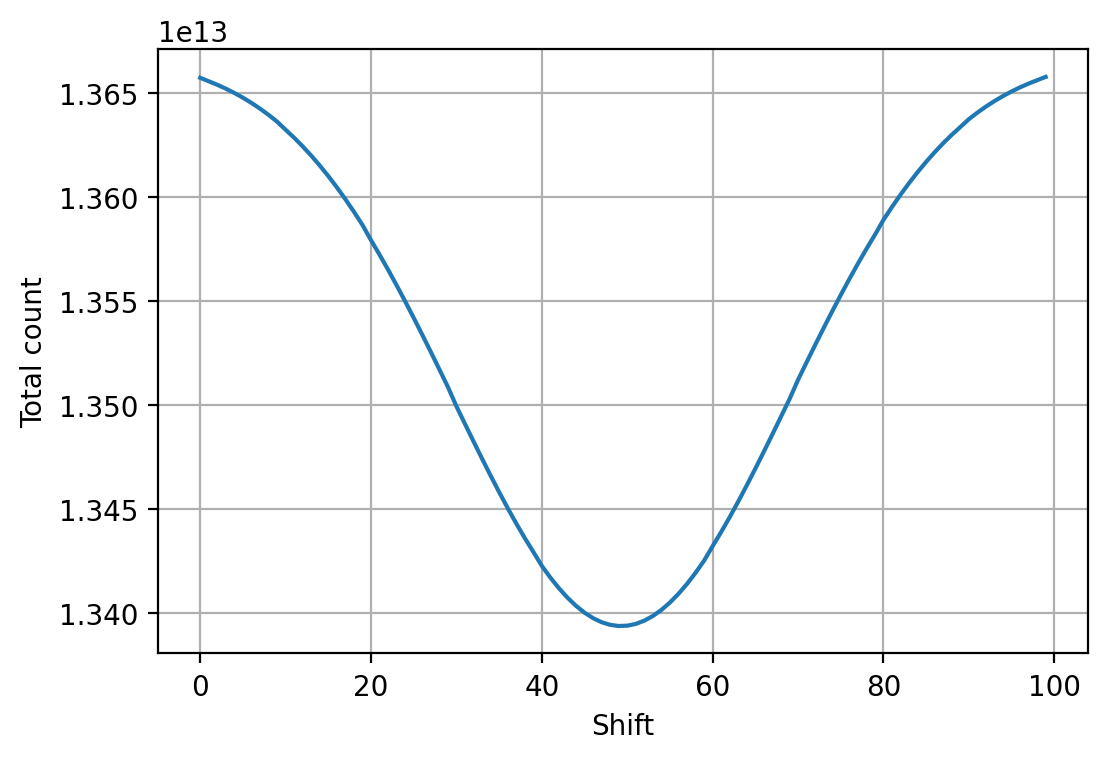

In [37]:
counts = []
for count, i in enumerate(shifts):
    print(f"{count}/{shifts.shape[0]}",end='\r')
    shifted_beam = np.roll(beam0,shift=int(i),axis=0)

    intensity = np.abs(np.fft.fftshift(np.fft.fft2(shifted_beam*modulator)))**2
    total_count = intensity.sum()
    counts.append(total_count)

    # if count % 10 == 0:
    #     fig, ax = plt.subplots(1,3,dpi=200)
    #     ax[0].imshow(np.abs(shifted_beam))
    #     ax[1].imshow(np.abs(modulator)*np.abs(shifted_beam))
    #     ax[2].imshow(intensity,norm=LogNorm())
    #     plt.show()

fig, ax = plt.subplots(dpi=200)
ax.plot(counts)
ax.grid()
ax.set_xlabel('Shift')
ax.set_ylabel('Total count')

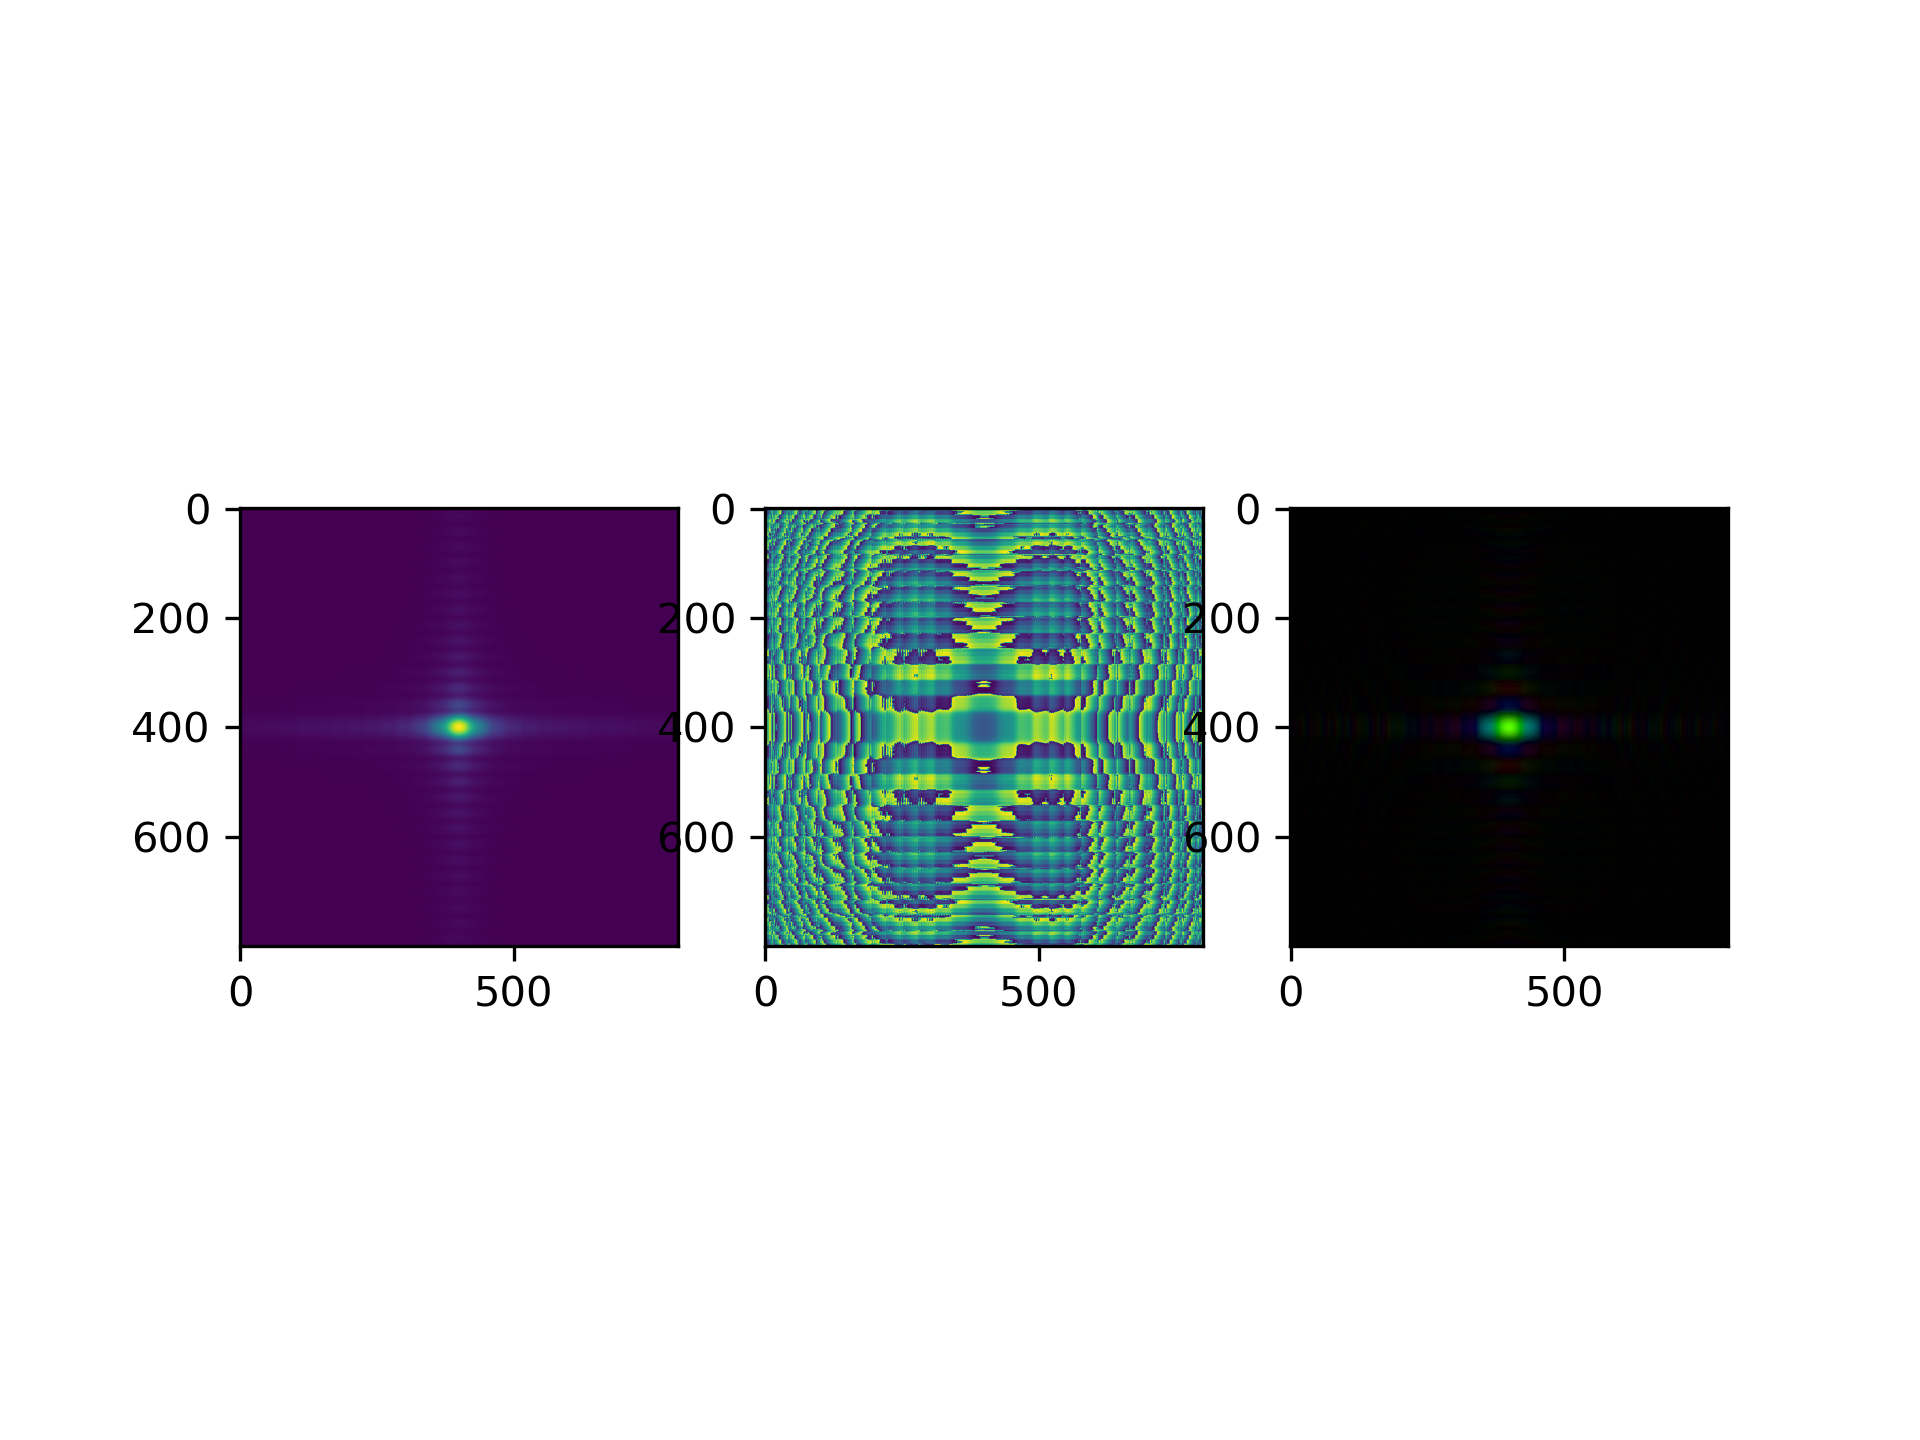

In [22]:
# path = "/ibira/lnls/labs/tepui/home/yuri.tonin/00000000/data/CAT_probe/complex_fields/CAT_probe@focus_pixel_1.25156microns.npy"
# probe = np.load(path)
# probe.shape
# from matplotlib.colors import hsv_to_rgb


# def MakeRGB(Amps,Phases,bias=0): 	# Make RGB image from amplitude and phase
#     """ Both amplitude (value) and phase (hue) should be adjusted to range [0,1] """ 
#     HSV = np.zeros((Amps.shape[0],Amps.shape[1],3),dtype=np.float32)
#     normalizer = (1.0-bias)/Amps.max()
#     HSV[:,:,0] = Phases[:,:]
#     HSV[:,:,1] = 1
#     HSV[:,:,2] = Amps[:,:]*normalizer + bias
#     return hsv_to_rgb(HSV)

# def SplitComplex(ComplexImg):
# 	Phases = np.angle(ComplexImg)	# Phases in range [-pi,pi]
# 	Phases = Phases*0.5/np.pi + 0.5
# 	Amps = np.absolute(ComplexImg)
# 	return Amps,Phases

# def convert_complex_to_RGB(ComplexImg,bias=0.01):
# 	Amps,Phases = SplitComplex(ComplexImg)
# 	return MakeRGB(Amps,Phases,bias)


# fig, ax = plt.subplots(1,3,dpi=300)
# ax[0].imshow(np.abs(probe))
# ax[1].imshow(np.angle(probe))
# ax[2].imshow(convert_complex_to_RGB(probe))